<a href="https://colab.research.google.com/github/ljh815/2025-1-myclass-BDA/blob/main/04w_A_mon_0331_easy_04_dataframe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#단원03

In [1]:
import sys
import pandas as pd
import numpy as np


In [2]:
!pip install koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 22.2 MB/s eta 0:00:00


In [3]:
import seaborn as sns

titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


survived : 0 = 사망, 1 = 생존
pclass : 1 = 1등석, 2 = 2등석, 3 = 3등석
sex : male = 남성, female = 여성
age : 나이
sibsp : 타이타닉 호에 동승한 자매 / 배우자의 수
parch : 타이타닉 호에 동승한 부모 / 자식의 수
fare : 티켓 요금
embarked : 탑승지, C = 셰르부르, Q = 퀸즈타운, S = 사우샘프턴
class : First = 1등석, Second = 2등석, Third = 3등석
who : 남/여/아이, 'man', 'woman', 'child'
adult_male : 남자 어른, True/False
deck : 방 위치, 'A', 'B', 'C', 'D', 'E', 'F', 'G', NaN
embark_town : 탑승지
alive : 생존, yes/no
alone : 1인 탑승, True/False

<Axes: xlabel='sex', ylabel='count'>

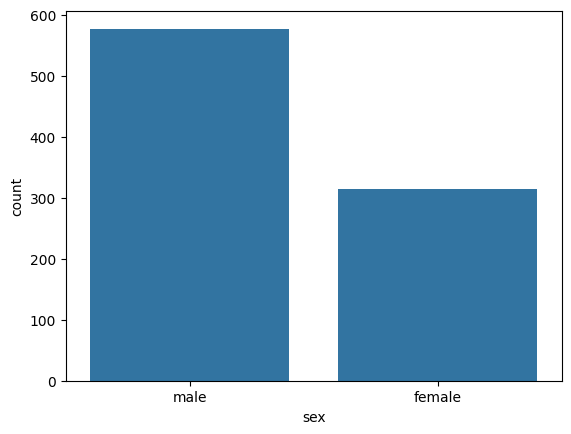

In [5]:
sns.countplot(titanic, x="sex")

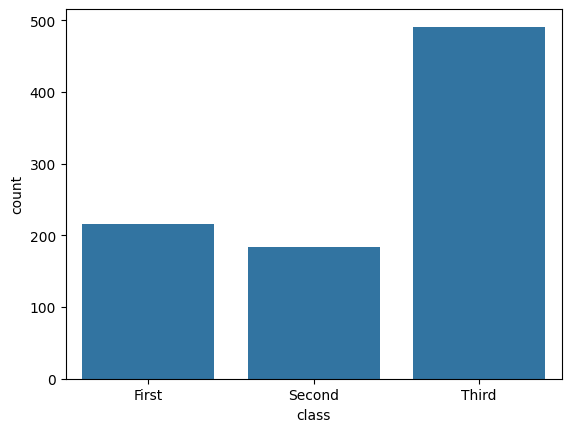

In [6]:
sns.countplot(titanic, x="class")

<Axes: xlabel='deck', ylabel='count'>

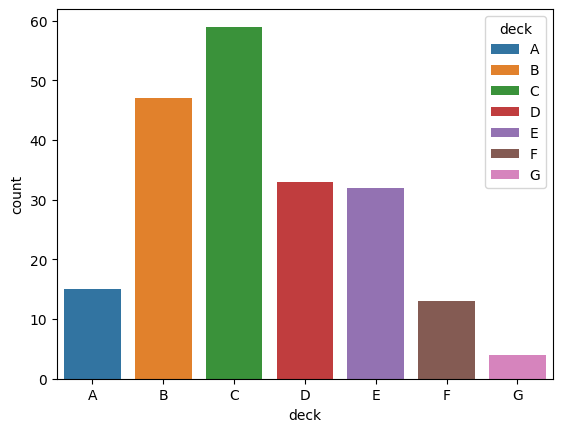

In [7]:
sns.countplot(titanic, x="deck", hue="deck")

<Axes: xlabel='class', ylabel='count'>

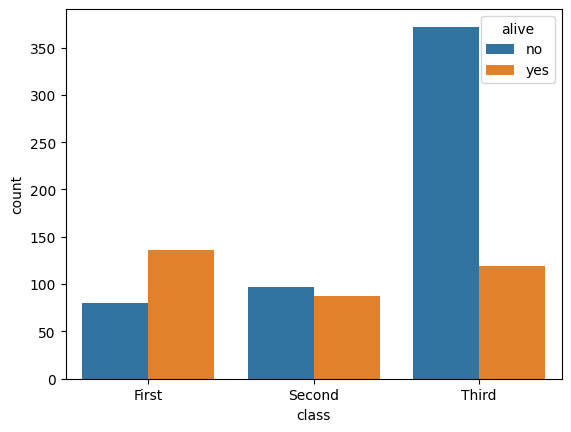

In [8]:
sns.countplot(titanic, x = 'class', hue='alive')

<Axes: xlabel='who', ylabel='percent'>

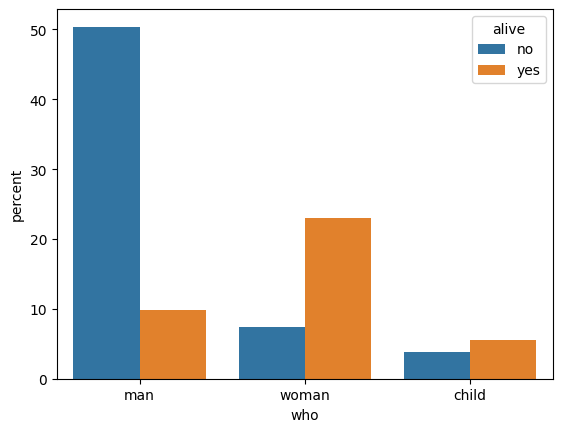

In [9]:
sns.countplot(titanic, x = "who", hue = "alive", stat = "percent")

# 열 검사

In [10]:
titanic["pclass"]

,pclass
0,3
1,1
2,3
3,1
4,3
...,...
886,2
887,1
888,3
889,1


In [11]:
titanic.pclass

,pclass
0,3
1,1
2,3
3,1
4,3
...,...
886,2
887,1
888,3
889,1


In [12]:
titanic[["pclass"]]

,pclass
0,3
1,1
2,3
3,1
4,3
...,...
886,2
887,1
888,3
889,1


In [13]:
titanic[["pclass", "alive"]]

,pclass,alive
0,3,no
1,1,yes
2,3,yes
3,1,yes
4,3,no
...,...,...
886,2,no
887,1,yes
888,3,no
889,1,yes


import sys
import pandas as pd
import numpy as np


In [14]:
titanic.pclass.values

array([3, 1, 3, 1, 3, 3, 1, 3, 3, 2, 3, 1, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2,
       3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 3, 2, 1, 1, 3, 3, 3, 3, 3, 2, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 1, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3,
       2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 2, 3, 3, 3,
       1, 3, 3, 3, 1, 3, 3, 3, 1, 1, 2, 2, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 3, 3, 3, 3, 2, 1, 3, 2, 3, 2, 2, 1, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 2, 2, 1, 1, 3, 1, 3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 2, 1, 3, 3,
       3, 1, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 3,
       3, 1, 2, 3, 3, 2, 3, 2, 3, 1, 3, 1, 3, 3, 2, 2, 3, 2, 1, 1, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 1, 3, 2, 1, 2,
       3, 2, 3, 3, 1, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 3,
       2, 3, 3, 1, 3, 2, 1, 2, 3, 3, 1, 3, 3, 3, 1, 1, 1, 2, 3, 3, 1, 1,
       3, 2, 3, 3, 1, 1, 1, 3, 2, 1, 3, 1, 3, 2, 3, 3, 3, 3, 3, 3, 1, 3,
       3, 3, 2, 3, 1, 1, 2, 3, 3, 1, 3, 1, 1, 1, 3,

In [15]:
titanic.pclass.unique()

array([3, 1, 2])

In [16]:
titanic.pclass.nunique()

3

In [17]:
titanic.nunique()

,0
survived,2
pclass,3
sex,2
age,88
sibsp,7
parch,7
fare,248
embarked,3
class,3
who,3


In [18]:
titanic.pclass.value_counts()

,count
pclass,
3,491
1,216
2,184


In [19]:
titanic.pclass.value_counts().sort_index()

,count
pclass,
1,216
2,184
3,491


In [20]:
titanic.deck.value_counts()

,count
deck,
C,59
B,47
D,33
E,32
A,15
F,13
G,4


In [21]:
titanic.pclass.value_counts()

,count
pclass,
3,491
1,216
2,184


 # 열 별 그룹화

In [22]:
titanic.groupby('sex').count()

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
sex,,,,,,,,,,,,,,
female,314,314,261,314,314,314,312,314,314,314,97,312,314,314
male,577,577,453,577,577,577,577,577,577,577,106,577,577,577


In [23]:
titanic.groupby('who').count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alive,alone
who,,,,,,,,,,,,,,
child,83,83,83,83,83,83,83,83,83,83,13,83,83,83
man,537,537,537,413,537,537,537,537,537,537,99,537,537,537
woman,271,271,271,218,271,271,271,269,271,271,91,269,271,271


In [24]:
titanic.groupby('embark_town').count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alive,alone
embark_town,,,,,,,,,,,,,,
Cherbourg,168,168,168,130,168,168,168,168,168,168,168,69,168,168
Queenstown,77,77,77,28,77,77,77,77,77,77,77,4,77,77
Southampton,644,644,644,554,644,644,644,644,644,644,644,128,644,644


In [25]:
titanic.groupby("pclass")

In [26]:
titanic.groupby("pclass")["fare"]

In [27]:
titanic.groupby("pclass")["fare"].mean()

,fare
pclass,
1,84.154687
2,20.662183
3,13.675550


In [30]:
titanic.groupby("embark_town")["fare"].mean()

,fare
embark_town,
Cherbourg,59.954144
Queenstown,13.276030
Southampton,27.079812


# 막대 그래프

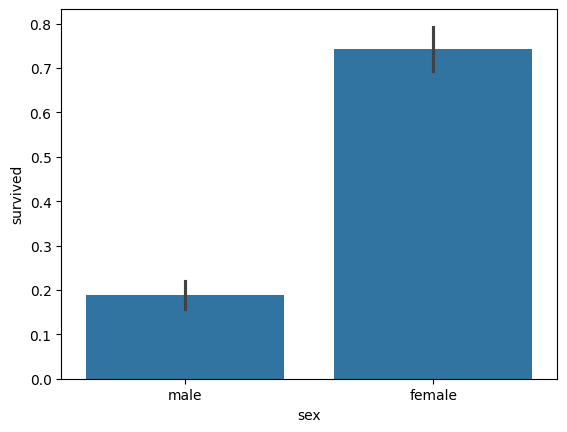

In [28]:
sns.barplot(data=titanic, x="sex", y="survived")

<Axes: xlabel='sex', ylabel='survived'>

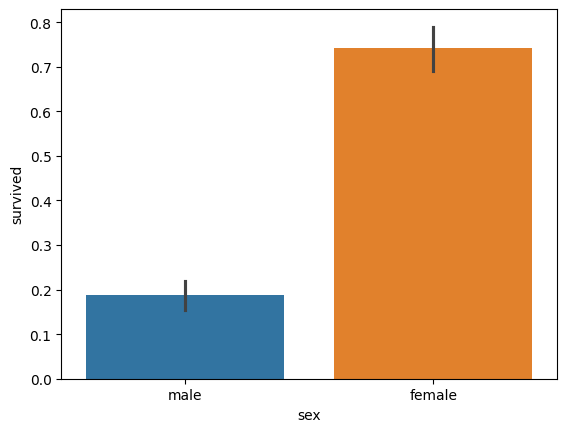

In [29]:
sns.barplot(data=titanic, x="sex", y="survived", hue="sex")

<Axes: xlabel='pclass', ylabel='survived'>

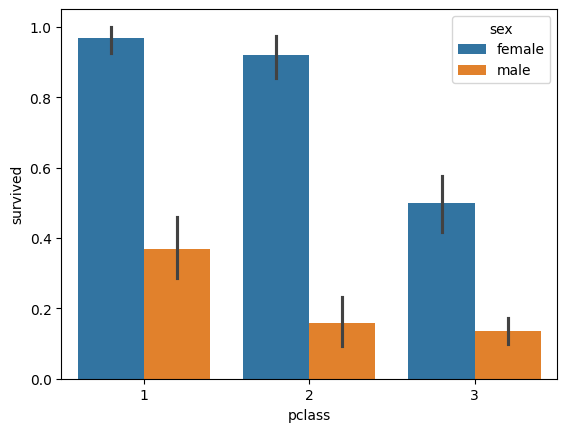

In [31]:
sns.barplot(titanic, x="pclass", y="survived", hue="sex")

<Axes: xlabel='class', ylabel='fare'>

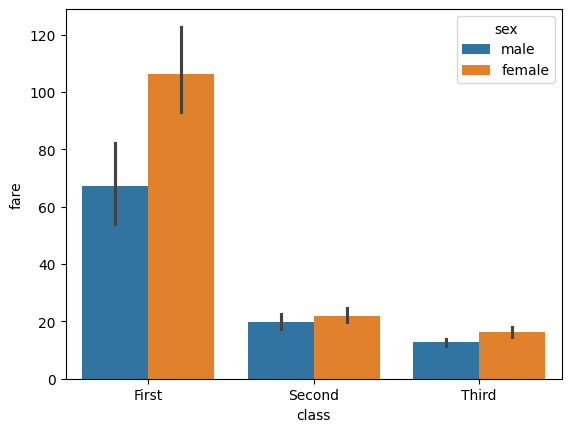

In [32]:
sns.barplot(titanic, x="class", y="fare", hue="sex")

<Axes: xlabel='deck', ylabel='fare'>

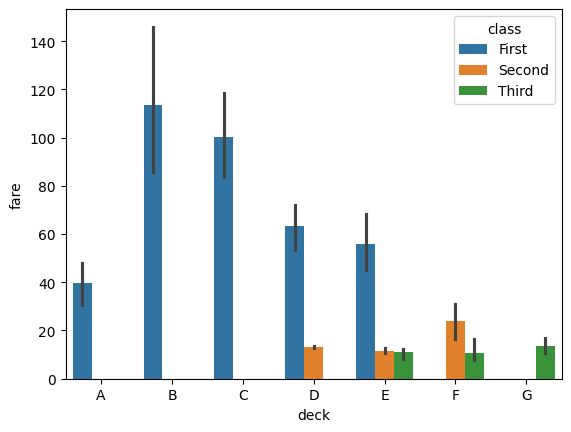

In [33]:
sns.barplot(titanic, x="deck", y="fare", hue='class')

<Axes: xlabel='deck', ylabel='survived'>

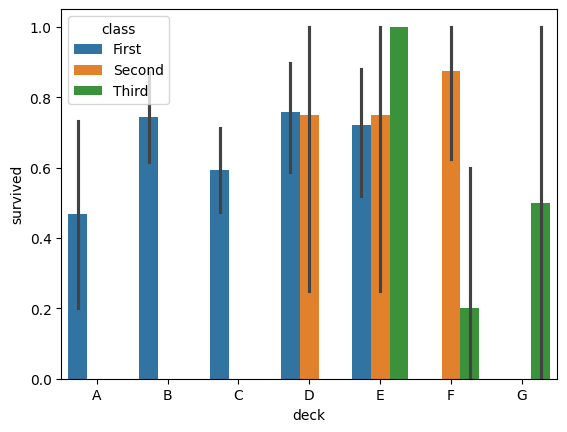

In [34]:
sns.barplot(titanic, x="deck", y="survived", hue='class')

# 단원04

In [35]:
import pandas as pd

df = pd.DataFrame({"name": ["김지훈", "이유진", "박종현", "김민지"],
                   "english": [90, 80, 60, 70],
                   "math": [50, 60, 100, 20]})
df

,name,english,math
0,김지훈,90,50
1,이유진,80,60
2,박종현,60,100
3,김민지,70,20


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     4 non-null      object
 1   english  4 non-null      int64 
 2   math     4 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 228.0+ bytes


In [37]:
df.describe()

,english,math
count,4.000000,4.000000
mean,75.000000,57.500000
std,12.909944,33.040379
min,60.000000,20.000000
25%,67.500000,42.500000
50%,75.000000,55.000000
75%,82.500000,70.000000
max,90.000000,100.000000


In [38]:
df.describe(include="all")

,name,english,math
count,4,4.000000,4.000000
unique,4,NaN,NaN
top,김지훈,NaN,NaN
freq,1,NaN,NaN
mean,NaN,75.000000,57.500000
std,NaN,12.909944,33.040379
min,NaN,60.000000,20.000000
25%,NaN,67.500000,42.500000
50%,NaN,75.000000,55.000000
75%,NaN,82.500000,70.000000


In [39]:
df["math"]

,math
0,50
1,60
2,100
3,20


In [40]:
sum(df["math"])

230

In [41]:
sum(df["english"])

300

In [42]:
df["math"].sum()

np.int64(230)

In [43]:
df["english"].sum()

np.int64(300)

In [44]:
df["math"].mean()

np.float64(57.5)

In [45]:
sum(df["math"]) / len(df)

57.5

In [46]:
sum(df["english"]) / len(df)

75.0

In [47]:
df["english"].mean()

np.float64(75.0)

In [48]:
df.english.mean()

np.float64(75.0)

In [49]:
df.sum()

,0
name,김지훈이유진박종현김민지
english,300
math,230


In [50]:
df.sum(axis=0)

,0
name,김지훈이유진박종현김민지
english,300
math,230


In [51]:
df.sum(axis=0, numeric_only=True)

,0
english,300
math,230


In [52]:
df.sum(axis='index', numeric_only=True)

,0
english,300
math,230


In [53]:
df.sum(axis=1, numeric_only=True)

,0
0,140
1,140
2,160
3,90


In [54]:
df.sum(axis='columns', numeric_only=True)

,0
0,140
1,140
2,160
3,90


In [55]:
df.mean(axis=1, numeric_only=True)

,0
0,70.0
1,70.0
2,80.0
3,45.0


In [56]:
df.mean(axis=0, numeric_only=True)

,0
english,75.0
math,57.5


#외부 데이터 활용

In [57]:
!git clone https://github.com/ai7dnn/data

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 24 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (24/24), 2.14 MiB | 5.40 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [60]:
exam = pd.read_excel('data/excel_exam.xlsx')
exam

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [61]:
exam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   id       20 non-null     int64
 1   nclass   20 non-null     int64
 2   math     20 non-null     int64
 3   english  20 non-null     int64
 4   science  20 non-null     int64
dtypes: int64(5)
memory usage: 932.0 bytes


In [62]:
exam.describe()

,id,nclass,math,english,science
count,20.00000,20.000000,20.000000,20.000000,20.000000
mean,10.50000,3.000000,57.450000,84.900000,59.450000
std,5.91608,1.450953,20.299015,12.875517,25.292968
min,1.00000,1.000000,20.000000,56.000000,12.000000
25%,5.75000,2.000000,45.750000,78.000000,45.000000
50%,10.50000,3.000000,54.000000,86.500000,62.500000
75%,15.25000,4.000000,75.750000,98.000000,78.000000
max,20.00000,5.000000,90.000000,98.000000,98.000000


In [63]:
exam.english.mean()

np.float64(84.9)

In [68]:
exam_novar = pd.read_excel('data/excel_exam_novar.xlsx')
exam_novar

,1,1.1,50,98,50.1
0,2,1,60,97,60
1,3,2,25,80,65
2,4,2,50,89,98
3,5,3,20,98,15
4,6,3,50,98,45
5,7,4,46,98,65
6,8,4,48,87,12


In [67]:
exam_novar = pd.read_excel('data/excel_exam_novar.xlsx',header=None)
exam_novar

,0,1,2,3,4
0,1,1,50,98,50
1,2,1,60,97,60
2,3,2,25,80,65
3,4,2,50,89,98
4,5,3,20,98,15
5,6,3,50,98,45
6,7,4,46,98,65
7,8,4,48,87,12


In [70]:
exam = pd.read_excel('data/excel_exam.xlsx', sheet_name = 'Sheet2')
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [71]:
exam = pd.read_excel('data/excel_exam.xlsx', sheet_name = 2)
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,99
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [73]:
df = pd.read_csv('data/exam.csv')
df.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


# 혼자서 해보기


In [75]:
mydf = pd.DataFrame({'제품': ['사과', '딸기', '수박'],
                     '가격': [1800, 1500, 3000],
                     '판매량': [24, 38, 13]})
mydf

,제품,가격,판매량
0,사과,1800,24
1,딸기,1500,38
2,수박,3000,13


In [76]:
mydf.sum(axis=0, numeric_only=True)

,0
가격,6300
판매량,75


In [77]:
mydf.mean(axis=0, numeric_only=True)

,0
가격,2100.0
판매량,25.0


In [78]:
mydf.sum(axis=1, numeric_only=True)

,0
0,1824
1,1538
2,3013


In [79]:
mydf.mean(axis=1, numeric_only=True)

,0
0,912.0
1,769.0
2,1506.5


#정리

In [ ]:
# 1. 데이터 프레임 만들기
df = pd.DataFrame({'name'    : ['김지훈', '이유진', '박동현', '김민지'],
                   'english' : [90, 80, 60, 70],
                   'math'    : [50, 60, 100, 20]})

In [ ]:
# 2.외부 데이터 이용하기

# 엑셀 파일 불러오기
df_exam = pd.read_excel('excel_exam.xlsx')

In [ ]:
# CSV 파일 불러오기
df_csv_exam = pd.read_csv('exam.csv')

In [ ]:
# CSV 파일로 저장하기
df_midterm = pd.DataFrame({'english' : [90, 80, 60, 70],
                           'math'    : [50, 60, 100, 20],
                           'nclass'  : [1, 1, 2, 2]})
df_midterm.to_csv('output_newdata2.csv')
df_midterm.to_csv('output_newdata3.csv', index = False)

# 단원05

In [80]:
import pandas as pd

df = pd.read_csv('data/2016년졸음운전.csv',
                 encoding='euc-kr', index_col=0)
df

,사고(건),사망(명),부상(명)
연월,,,
2016년1월,192,5,387
2016년2월,174,6,328
2016년3월,217,7,435
2016년4월,216,7,419
2016년5월,239,13,522
2016년6월,200,12,362
2016년7월,227,9,460
2016년8월,230,7,490
2016년9월,187,13,347


In [81]:
df.dtypes

,0
사고(건),int64
사망(명),int64
부상(명),int64


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 2016년1월 to 2016년12월
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   사고(건)   12 non-null     int64
 1   사망(명)   12 non-null     int64
 2   부상(명)   12 non-null     int64
dtypes: int64(3)
memory usage: 384.0+ bytes


In [84]:
df.describe()

,사고(건),사망(명),부상(명)
count,12.000000,12.000000,12.000000
mean,202.750000,8.166667,408.250000
std,23.014324,3.186144,60.051682
min,168.000000,4.000000,328.000000
25%,186.000000,5.750000,363.500000
50%,200.000000,7.000000,402.500000
75%,219.500000,10.500000,441.250000
max,239.000000,13.000000,522.000000


In [85]:
df.T

연월,2016년1월,2016년2월,2016년3월,2016년4월,2016년5월,2016년6월,2016년7월,2016년8월,2016년9월,2016년10월,2016년11월,2016년12월
사고(건),192,174,217,216,239,200,227,230,187,183,200,168
사망(명),5,6,7,7,13,12,9,7,13,10,5,4
부상(명),387,328,435,419,522,362,460,490,347,367,418,364


In [86]:
df.sum()

,0
사고(건),2433
사망(명),98
부상(명),4899


In [87]:
  df.sum(axis=0)

,0
사고(건),2433
사망(명),98
부상(명),4899


In [88]:
df.sum(axis=1)

,0
연월,
2016년1월,584
2016년2월,508
2016년3월,659
2016년4월,642
2016년5월,774
2016년6월,574
2016년7월,696
2016년8월,727
2016년9월,547


In [89]:
df.cumsum(axis=0)

,사고(건),사망(명),부상(명)
연월,,,
2016년1월,192,5,387
2016년2월,366,11,715
2016년3월,583,18,1150
2016년4월,799,25,1569
2016년5월,1038,38,2091
2016년6월,1238,50,2453
2016년7월,1465,59,2913
2016년8월,1695,66,3403
2016년9월,1882,79,3750


In [90]:
df.cumsum(axis=1)

,사고(건),사망(명),부상(명)
연월,,,
2016년1월,192,197,584
2016년2월,174,180,508
2016년3월,217,224,659
2016년4월,216,223,642
2016년5월,239,252,774
2016년6월,200,212,574
2016년7월,227,236,696
2016년8월,230,237,727
2016년9월,187,200,547


In [91]:
df.mean()

,0
사고(건),202.750000
사망(명),8.166667
부상(명),408.250000


In [92]:
df.mean(axis=0)

,0
사고(건),202.750000
사망(명),8.166667
부상(명),408.250000


In [93]:
df.mean(axis=1)

,0
연월,
2016년1월,194.666667
2016년2월,169.333333
2016년3월,219.666667
2016년4월,214.000000
2016년5월,258.000000
2016년6월,191.333333
2016년7월,232.000000
2016년8월,242.333333
2016년9월,182.333333


In [94]:
df.mean(axis=None)

np.float64(206.38888888888889)

In [95]:
df.max()

,0
사고(건),239
사망(명),13
부상(명),522


In [96]:
df.max(axis=0)

,0
사고(건),239
사망(명),13
부상(명),522


In [97]:
df.max(axis=1)

,0
연월,
2016년1월,387
2016년2월,328
2016년3월,435
2016년4월,419
2016년5월,522
2016년6월,362
2016년7월,460
2016년8월,490
2016년9월,347


In [98]:
df.max(axis=None)

522

In [99]:
df.min()

,0
사고(건),168
사망(명),4
부상(명),328


In [100]:
df.min(axis=0)

,0
사고(건),168
사망(명),4
부상(명),328


In [101]:
df.min(axis=1)

,0
연월,
2016년1월,5
2016년2월,6
2016년3월,7
2016년4월,7
2016년5월,13
2016년6월,12
2016년7월,9
2016년8월,7
2016년9월,13


In [102]:
df.min(axis=None)

4

In [103]:
import pandas as pd

mpg = pd.read_csv('data/mpg.csv')

In [104]:
mpg.head(8)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact


In [105]:
mpg.tail()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize
233,volkswagen,passat,3.6,2008,6,auto(s6),f,17,26,p,midsize


In [106]:
mpg.sample(10)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
18,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv
116,hyundai,tiburon,2.0,1999,4,manual(m5),f,19,29,r,subcompact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
115,hyundai,tiburon,2.0,1999,4,auto(l4),f,19,26,r,subcompact
124,jeep,grand cherokee 4wd,4.0,1999,6,auto(l4),4,15,20,r,suv
109,hyundai,sonata,2.4,1999,4,manual(m5),f,18,27,r,midsize
117,hyundai,tiburon,2.0,2008,4,manual(m5),f,20,28,r,subcompact
119,hyundai,tiburon,2.7,2008,6,auto(l4),f,17,24,r,subcompact
40,dodge,caravan 2wd,3.3,1999,6,auto(l4),f,16,22,r,minivan
52,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,14,19,r,pickup


In [107]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [108]:
mpg.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [109]:
mpg.describe(include="all")

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
count,234,234,234.000000,234.000000,234.000000,234,234,234.000000,234.000000,234,234
unique,15,38,NaN,NaN,NaN,10,3,NaN,NaN,5,7
top,dodge,caravan 2wd,NaN,NaN,NaN,auto(l4),f,NaN,NaN,r,suv
freq,37,11,NaN,NaN,NaN,83,106,NaN,NaN,168,62
mean,NaN,NaN,3.471795,2003.500000,5.888889,NaN,NaN,16.858974,23.440171,NaN,NaN
std,NaN,NaN,1.291959,4.509646,1.611534,NaN,NaN,4.255946,5.954643,NaN,NaN
min,NaN,NaN,1.600000,1999.000000,4.000000,NaN,NaN,9.000000,12.000000,NaN,NaN
25%,NaN,NaN,2.400000,1999.000000,4.000000,NaN,NaN,14.000000,18.000000,NaN,NaN
50%,NaN,NaN,3.300000,2003.500000,6.000000,NaN,NaN,17.000000,24.000000,NaN,NaN
75%,NaN,NaN,4.600000,2008.000000,8.000000,NaN,NaN,19.000000,27.000000,NaN,NaN


In [110]:
mpg[["category"]]

,category
0,compact
1,compact
2,compact
3,compact
4,compact
...,...
229,midsize
230,midsize
231,midsize
232,midsize


In [111]:
mpg[["category"]].describe()

,category
count,234
unique,7
top,suv
freq,62


In [112]:
mpg[["manufacturer", "model", "trans", "drv", "fl", "category"]].describe()

,manufacturer,model,trans,drv,fl,category
count,234,234,234,234,234,234
unique,15,38,10,3,5,7
top,dodge,caravan 2wd,auto(l4),f,r,suv
freq,37,11,83,106,168,62


In [113]:
mpg.fl.unique()

array(['p', 'r', 'e', 'd', 'c'], dtype=object)

In [114]:
mpg["fl"].unique()

array(['p', 'r', 'e', 'd', 'c'], dtype=object)

In [115]:
mpg.fl.value_counts()

,count
fl,
r,168
p,52
e,8
d,5
c,1


In [116]:
mpg.fl.value_counts().sort_index()

,count
fl,
c,1
d,5
e,8
p,52
r,168


In [117]:
mpg.fl.value_counts().sort_index(ascending=False)

,count
fl,
r,168
p,52
e,8
d,5
c,1


In [118]:
mpg.fl.value_counts().sort_values()

,count
fl,
c,1
d,5
e,8
p,52
r,168


In [119]:
mpg.fl.value_counts().sort_values(ascending=False)

,count
fl,
r,168
p,52
e,8
d,5
c,1


In [120]:
mpg[["fl", "category"]].value_counts()

fl  category  
r   suv           48
    pickup        30
    subcompact    29
    midsize       26
    compact       25
p   compact       21
    midsize       15
r   minivan       10
p   suv            8
    2seater        5
e   suv            4
    pickup         3
p   subcompact     3
d   subcompact     2
    suv            2
c   subcompact     1
d   compact        1
e   minivan        1
Name: count, dtype: int64

In [121]:
mpg[["fl", "category"]].value_counts().to_frame()

count
fl category         
r  suv            48
   pickup         30
   subcompact     29
   midsize        26
   compact        25
p  compact        21
   midsize        15
r  minivan        10
p  suv             8
   2seater         5
e  suv             4
   pickup          3
p  subcompact      3
d  subcompact      2
   suv             2
c  subcompact      1
d  compact         1
e  minivan         1

In [122]:
sum([4,7,8])

19

In [123]:
df = pd.DataFrame({'x' : [1,2,3]})
df.head()

,x
0,1
1,2
2,3


In [124]:
df_raw = pd.DataFrame({'var1' : [1,2,1],
                       'var2' : [2,3,2],
                       'var3' : [10,20,30]})
df_raw

,var1,var2,var3
0,1,2,10
1,2,3,20
2,1,2,30


In [125]:
df_new = df_raw.copy()
df_new

,var1,var2,var3
0,1,2,10
1,2,3,20
2,1,2,30


In [126]:
df_new.rename(columns = {'var2': 'v2'})

,var1,v2,var3
0,1,2,10
1,2,3,20
2,1,2,30


In [127]:
df_new

,var1,var2,var3
0,1,2,10
1,2,3,20
2,1,2,30


In [128]:
df_new.rename(columns = {'var2': 'v2'}, inplace=True)
df_new

,var1,v2,var3
0,1,2,10
1,2,3,20
2,1,2,30


In [129]:
df_raw

,var1,var2,var3
0,1,2,10
1,2,3,20
2,1,2,30


In [130]:
df_new

,var1,v2,var3
0,1,2,10
1,2,3,20
2,1,2,30


In [131]:
df_new.rename(index = {0: "x", 1: "y", 2: "z"}, inplace=True)
df_new

,var1,v2,var3
x,1,2,10
y,2,3,20
z,1,2,30


In [132]:
df = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
df.rename(columns={"A": "a", "B": "c"})

,a,c
0,1,4
1,2,5
2,3,6


In [133]:
df = pd.DataFrame({'var1' : [4, 3, 8],
                   'var2' : [2, 6, 1]})
df

,var1,var2
0,4,2
1,3,6
2,8,1


In [134]:
df1 = df.copy()
df1

,var1,var2
0,4,2
1,3,6
2,8,1


In [135]:
df1['var_sum'] = df1['var1'] + df1['var2']
df1

,var1,var2,var_sum
0,4,2,6
1,3,6,9
2,8,1,9


In [136]:
df1["var_mean"] = (df1["var1"] + df1["var2"]) / 2
df1

,var1,var2,var_sum,var_mean
0,4,2,6,3.0
1,3,6,9,4.5
2,8,1,9,4.5


In [137]:
df2 = df.copy()
df2

,var1,var2
0,4,2
1,3,6
2,8,1


In [138]:
df2.sum()

,0
var1,15
var2,9


In [139]:
df2.sum(axis=1)

,0
0,6
1,9
2,9


In [140]:
df2['my_sum'] = df2.sum(axis='columns')
df2

,var1,var2,my_sum
0,4,2,6
1,3,6,9
2,8,1,9


In [141]:
df2[["var1","var2"]]

,var1,var2
0,4,2
1,3,6
2,8,1


In [142]:
df2["my_mean"] = df2[["var1","var2"]].mean(axis=1)
df2

,var1,var2,my_sum,my_mean
0,4,2,6,3.0
1,3,6,9,4.5
2,8,1,9,4.5
